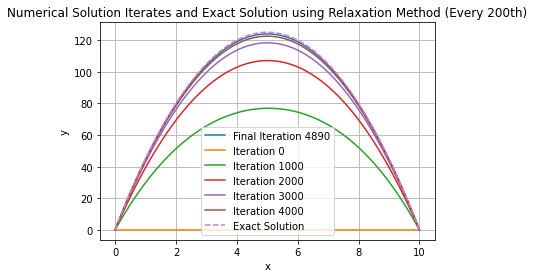

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y, yp, h):
    return -10

def exact_solution(x):
    return -10*(x**2)/2 + 10*10*x/2

def relaxation_method(f, a, b, y0, yp0, beta, h, max_iter=10000, tol=1e-6):
    # Number of grid points
    N = int((b - a) / h) + 1
    # Initialize solution arrays
    y = np.zeros((max_iter, N))  # Store each iterate
    yp = np.zeros((max_iter, N))  # Store each iterate
    # Apply boundary conditions
    y[0, 0] = y0
    yp[0, 0] = yp0
    # Initialize iteration counter
    iter_count = 0
    # Relaxation loop
    for k in range(1, max_iter):  # Start from 1 because initial conditions are already set
        iter_count += 1
        # Store the original values of y and yp for comparison
        y[k, :] = y[k-1, :]
        yp[k, :] = yp[k-1, :]
        # Update interior points
        for i in range(1, N-1):
            yp[k, i] = (y[k, i+1] - y[k, i-1]) / (2 * h)
            y[k, i] = (y[k, i+1] + y[k, i-1] - h**2 * f(a + i*h, y[k, i], yp[k, i], h)) / 2
        # Update boundary condition at a
        yp[k, 1] = yp[k, 0] + (y[k, 1] - y[k, 0]) / h
        # Update boundary condition at b
        y[k, -1] = beta
        yp[k, -1] = (y[k, -1] - y[k, -2]) / h
        # Check for convergence
        if np.allclose(y[k, :], y[k-1, :], atol=tol) and np.allclose(yp[k, :], yp[k-1, :], atol=tol):
            break
    return y[:k+1], yp[:k+1]

# Define parameters
a = 0
b = 10
y0 = 0
yp0 = 0
beta = 0
h = 0.1
max_iter = 10000

# Solve using relaxation method
y_solution, yp_solution = relaxation_method(f, a, b, y0, yp0, beta, h, max_iter=max_iter)

#Plot the last closest iteration
plt.plot(x_values, y_solution[4890], label=f'Final Iteration {4890}')

# Plot every 1000th iterate
x_values = np.linspace(a, b, len(y_solution[0]))
for k in range(0, len(y_solution), 1000):
    plt.plot(x_values, y_solution[k], label=f'Iteration {k}')

# Plot the exact solution
plt.plot(x_values, exact_solution(x_values), label='Exact Solution', linestyle='--')

plt.xlabel('x')
plt.ylabel('y')
plt.title("Numerical Solution Iterates and Exact Solution using Relaxation Method (Every 200th)")
plt.legend()
plt.grid(True)
plt.show()
